# 課題5 ネットワーク分析

配点
- Q1 4P
- Q2 4P
- Q3 2P

In [ ]:
# モジュールのインポート
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

以下では、networkxモジュールに含まれるデータセット、空手クラブのソーシャルネットワーク、からグラフオブジェクトを作成し、ネットワーク全体を可視化しています。ネットワークは無方向で重みなしです。また自己ループやノード間の多重リンクはありません。

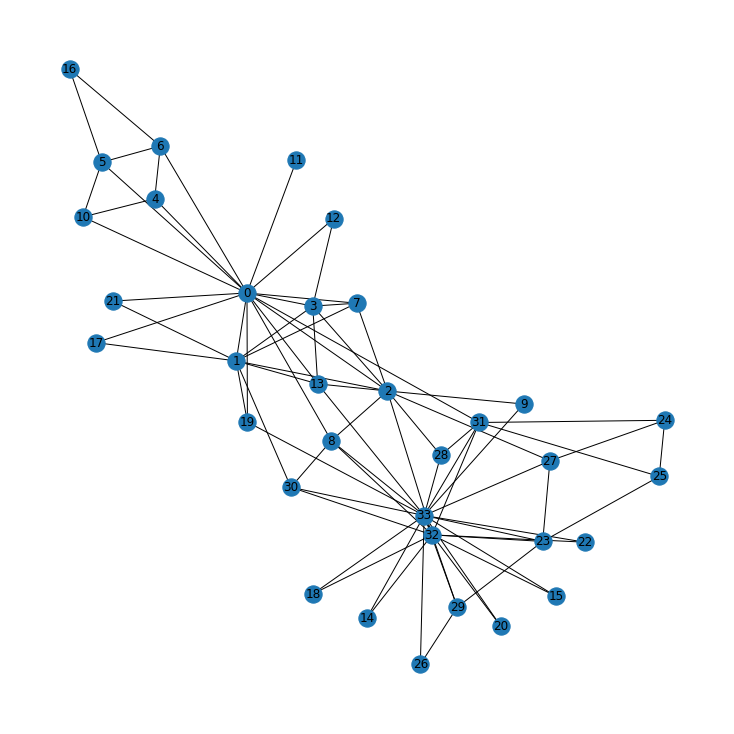

In [ ]:
G = nx.karate_club_graph() # グラフの作成
pos = nx.spring_layout(G) # 可視化のレイアウト
plt.figure(figsize=(10,10)) # 可視化のサイズ
nx.draw(G, pos=pos, with_labels=True) # 可視化

このネットワークには34のノードと78のリンクが含まれ、各ノードには0から33の数字がふられています。以下ではこの数字をノードのラベルとして用います。

In [ ]:
print(len(G)) # ノード数
print(G.size()) # リンク数

34
78


このネットワークの隣接行列`adj_matrix`は、以下の通りです。

In [ ]:
adj_matrix=nx.adjacency_matrix(G).toarray() # 隣接行列の取得
for row in adj_matrix:
    print(row)

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
[1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0

## Q1.1
以下の辞書`adj_list`は、上記のネットワークのノードをキー、そのノードに隣接しているノードのリストを値として持つ辞書です。例えば、キーが31の値のリストを見ることで、ノード31には0, 24, 25, 28, 32, 33のノードが隣接していることがわかります。このような各ノードの隣接ノードリストの辞書を隣接リストと呼びます。

```Python
adj_list={0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31],
                1: [0, 2, 3, 7, 13, 17, 19, 21, 30],
                2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32],
                  ...
                31: [0, 24, 25, 28, 32, 33],
                32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33],
                33: [8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]}
```

隣接行列`adj_matrix`を受け取り、隣接リストとなる辞書`adj_list`を作成して返す`get_adj_list()`関数を実装してください。

In [ ]:
def get_adj_list(adj_matrix):
    adj_list={}
    for i, row in enumerate(adj_matrix):
      adj_list[i] = []
      for j, column in enumerate(row):
        if column != 0:
          adj_list[i].append(j)
    return adj_list

`get_adj_list`関数が完成したら、以下のセルを実行して、`adj_list[0]`や`adj_list[33]`を表示し、上記に示されている各ノードの隣接ノードリストが作成できているか確認してください。

In [ ]:
adj_list=get_adj_list(adj_matrix)

print(adj_list[0])
print(adj_list[33])

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
[8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]


### Q1.2
授業資料の幅優先探索のアルゴリズムを参考に、第1引数として隣接リスト、第2引数として始点ノードのラベルを受け取り、始点から各ノードへの距離の辞書`d`を返す以下の`bfs`関数を完成させてください。隣接リストは上記で作成した`adj_list`を用います。`d`は、キーがノードのラベル、値が始点からそのノードへの距離となる辞書です。

授業資料中の`Q.enqueue`, `Q.dequeue`はそれぞれコード中の`Q.append`, `Q.popleft`に対応します。

In [ ]:
from collections import deque
def bfs(g, s):
    Q = deque()
    visited = {}
    d = {}

    for i in g.keys():
        d[i] = np.inf
        visited[i] = False
    visited[s] = True
    d[s] = 0
    Q.append(s)

    while Q:
        i = Q.popleft()
        for adjacent_node in g[i]:
          if not visited[adjacent_node]:
            visited[adjacent_node] = True
            d[adjacent_node] = d[i] + 1
            Q.append(adjacent_node)

    return d

`bfs`関数が完成したら、以下のセルを実行して動作を確認してください。ノード0からノード26への長さは3、ノード11からノード26への長さは4となります。

In [ ]:
d1=bfs(adj_list, 0)
print(d1[26])

d2=bfs(adj_list, 11)
print(d2[26])

3
4


## Q2
以下では、空手クラブのソーシャルネットワークデータについて各ノードの次数中心性を計算し、次数中心性の上位のノードを表示しています。ノード33が最も次数中心性が高いことがわかります。

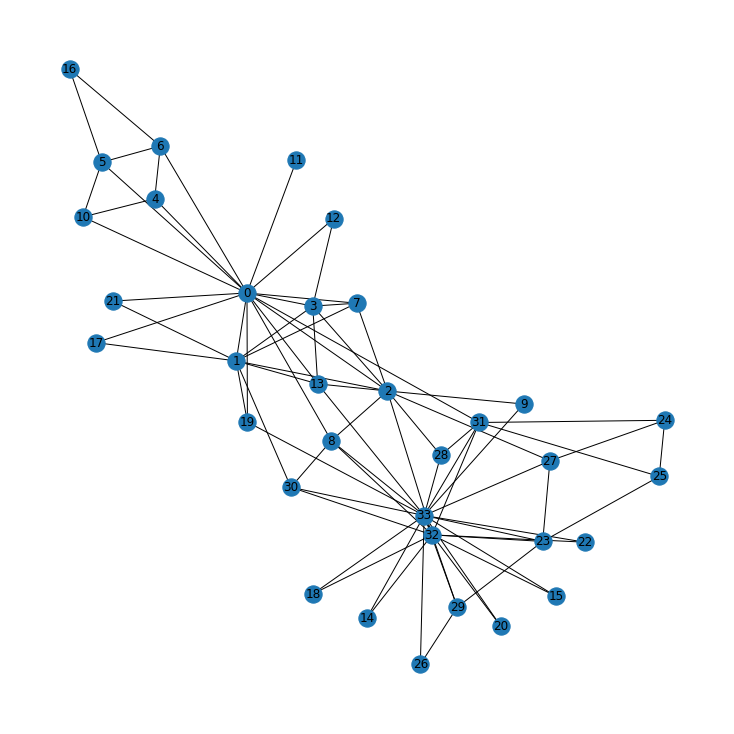

In [ ]:
G = nx.karate_club_graph()
plt.figure(figsize=(10,10)) # 可視化のサイズ
nx.draw(G, pos=pos, with_labels=True) # 可視化

In [ ]:
# 次数中心性 (次数/最大次数（N-1))
degree=nx.degree_centrality(G)
print(pd.Series(degree).sort_values(ascending=False).head(5)) 

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64


近接中心性、媒介中心性、固有ベクトル中心性の各中心性について、上位のノードは以下の通りです。

ネットワーク図の各ノードの位置を参照しながらそれぞれの中心性で上位のノードがどのような位置にあるか観察してください。

In [ ]:
# 近接中心性
closeness = nx.closeness_centrality(G)
print(pd.Series(closeness).sort_values(ascending=False).head(5))

# 媒介中心性
betweenness = nx.betweenness_centrality(G)
print(pd.Series(betweenness).sort_values(ascending=False).head(5))

# 固有ベクトル中心性
eigen = nx.eigenvector_centrality(G)
print(pd.Series(eigen).sort_values(ascending=False).head(5))

0     0.568966
2     0.559322
33    0.550000
31    0.540984
13    0.515625
dtype: float64
0     0.437635
33    0.304075
32    0.145247
2     0.143657
31    0.138276
dtype: float64
33    0.373371
0     0.355483
2     0.317189
32    0.308651
1     0.265954
dtype: float64


以下では各ノードのPageRankを計算する関数を実装します。`pagerank_centrality`関数は、第1引数としてネットワークの隣接行列、第2引数としてダンピング係数（通常移動とテレポート移動の割合を指定）、第3引数としてベキ乗法の繰り返し回数を受け取り、各ノードのPageRankを要素とするベクトルを返します。ベクトルの各要素のインデックスはノードのラベルに対応します。

PageRankを更新するための行列$B$はダンピング係数を$\alpha$、推移確率行列を$A$として以下のように定義されます。行列$A$はネットワークの隣接行列について、すべての要素が0の列があればその列のすべての要素を1とした上で、隣接行列の各要素についてその列の和で割ったものです。

$B=\alpha A+\frac{1-\alpha}{ノード数}$

行列$B$を用いてPageRankのベクトル$x=(x_1,x_2,...,x_n)$は以下のように更新されます。

$x=Bx$

なお、PageRankでは元々$x$は正規化されているのでここでは冗長な処理ですが、ベキ乗法の手続きでは$x$の更新ごとに正規化処理を行います

$x=x/\Sigma_{i=1}^n x_i$ 

In [39]:
def pagerank_centrality(adj_matrix, alpha=0.85, t=100):
    # すべての要素が0の列があればその列のすべての要素を1とする
    adj_matrix[:, adj_matrix.sum(0) == 0] = 1
    A = adj_matrix / adj_matrix.sum(0)
    B = alpha * A + (1 - alpha) / len(adj_matrix)
    x = np.ones((len(adj_matrix),))
    for _ in range(t):
      x = np.dot(B, x)
      x /= x.sum()
    return x

`pagerank_centrality`関数が完成したら、以下のセルを実行して動作を確認してください。最もPageRankが高いノードは33でそのPageRankは$\simeq0.10$、次にPageRankが高いノードは0でそのPageRankは$\simeq0.09$となります。

In [40]:
adj_matrix=nx.adjacency_matrix(G).toarray()
pagerank=pagerank_centrality(adj_matrix, 0.85, 100)
# print(pagerank)
print(pd.Series(pagerank).sort_values(ascending=False).head(5))

33    0.100919
0     0.096997
32    0.071693
2     0.057079
1     0.052877
dtype: float64


NetworkXの`nx.pagerank`関数を使って各ノードのPageRankを計算すると以下のようになります。

In [41]:
pr=nx.pagerank(G, alpha=0.85, max_iter=100)
print(pd.Series(pr).sort_values(ascending=False).head(5))

33    0.100918
0     0.097002
32    0.071692
2     0.057078
1     0.052878
dtype: float64


## Q3
以下では、空手クラブのソーシャルネットワークデータを用いてコミュニティ抽出を行います。まず、コミュニティ抽出前のネットワークを可視化します。

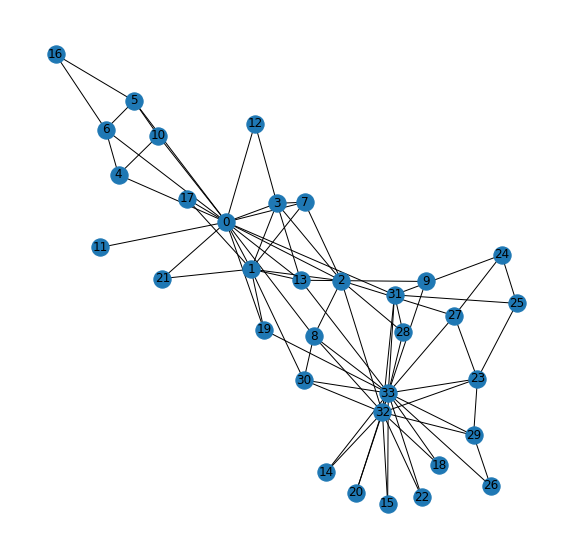

In [42]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos)
_ = plt.axis('off')

エッジ媒介中心性を用いたコミュニティ抽出（Girvan-Newman法）を行う以下の`girvan_newman`関数を完成させてください。`girvan_newman`関数は引数としてnetworkxのグラフオブジェクトを受け取り、各コミュニティのノード集合を要素としたリストを返します。

In [51]:
def girvan_newman(G):
    G = G.copy() # グラフGのエッジを除いていくのでグラフオブジェクトをコピーしておく
    removed_edges=[] # 取り除いたエッジのリスト
    while nx.number_connected_components(G) == 1: # グラフが分割されるまで繰り返す
      # エッジ媒介中心性が一番大きいエッジをGから取り除く
      # 取り除いたエッジの両端ノードのIDのペアをタプルとしてremoved_edgesに追加
      best_edge = find_best_edge(G)
      removed_edges.append(best_edge)
      G.remove_edge(best_edge[0], best_edge[1])
    return list(nx.connected_components(G)), removed_edges

def find_best_edge(G): # グラフGにおいてエッジ媒介中心性が一番大きいエッジの両端ノードをタプルとして返す関数
    edge_between = nx.edge_betweenness_centrality(G)     
    return max(edge_between, key=edge_between.get)

`girvan_newman`関数が完成したら、以下のセルを実行して動作を確認してください。取り除かれるエッジのリスト`removed_edges`は以下になります。

```Python
 [(0, 31), (0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]
 ```

In [52]:
communities, removed_edges = girvan_newman(G)
print(removed_edges)

[(0, 31), (0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]


以下のセルを実行してネットワークを可視化し、先の処理で抽出されたコミュニティを確認してください。取り除かれたエッジは破線で示されています。

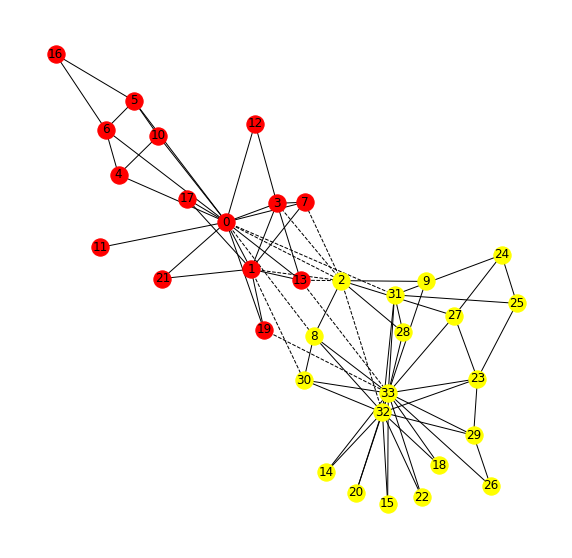

In [53]:
keeped_edges = set(G.edges()) - set(removed_edges)
colors = ['red', 'yellow']

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(G, pos, edgelist=keeped_edges)
nx.draw_networkx_edges(G, pos, edgelist=removed_edges, style='dashed')
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=community, node_color=color)
nx.draw_networkx_labels(G, pos=pos)
_ = plt.axis('off')

### 参考

In [54]:
# networkx(バージョン2.X以上)のGirvan–Newman法の関数によるコミュニティ抽出
community_generator = nx.community.girvan_newman(G)

# community_generatorはジェネレーターとなっており、for文を繰り返すごとにコミュニティ分割を行う
# 最終的には各ノードが1つのコミュニティの状態となる
for communities in community_generator: 
    print(communities)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25

## コードのテスト
以下の実行ボタンを押してから、設問ごとにCheck関数でコードのテストをしてください。

In [55]:
## コードのテストの前にこのセルを実行してください
!pip install prog_edu_assistant_tools
import re
import sys
import jinja2
from IPython.core import display
from google.colab import _message as google_message
from prog_edu_assistant_tools.magics import report, autotest, CaptureOutput
from prog_edu_assistant_tools.check import Check

## Q1.1

In [56]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1_1')

## Q1.2

In [57]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1_2')

## Q2

In [58]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q2')

## Q3

In [59]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q3')